In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p

__Loading the Dataset__

In [3]:
matches_df = pd.read_csv(r"C:\Users\Asus\Downloads\archive (2)\matches.csv")
deliveries_df = pd.read_csv(r"C:\Users\Asus\Downloads\archive (2)\deliveries1.csv")

__Merging the Datasets__

In [5]:
df=pd.merge(matches_df,deliveries_df,on='id',how='outer')

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df.isna().sum()/len(df)*100

id                   0.000000
season               0.000000
city                 4.751265
date                 0.000000
match_type           0.000000
player_of_match      0.187797
venue                0.000000
team1                0.000000
team2                0.000000
toss_winner          0.000000
toss_decision        0.000000
winner               0.187797
result               0.000000
result_margin        1.580561
target_runs          0.118427
target_overs         0.118427
super_over           0.000000
method              98.602637
umpire1              0.000000
umpire2              0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batter               0.000000
bowler               0.000000
non_striker          0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
extras_type         94.586463
is_wicket            0.000000
player_dis

__Filling Missing values__

In [9]:
df.drop(columns=['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

In [10]:
df.isna().sum()

id                      0
season                  0
city                12397
date                    0
match_type              0
player_of_match       490
venue                   0
team1                   0
team2                   0
toss_winner             0
toss_decision           0
winner                490
result                  0
result_margin        4124
target_runs           309
target_overs          309
super_over              0
method             257274
umpire1                 0
umpire2                 0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batter                  0
bowler                  0
non_striker             0
batsman_runs            0
extra_runs              0
total_runs              0
is_wicket               0
dtype: int64

In [11]:
df.drop(columns=['method'], inplace=True)

In [12]:
df.loc[(df['city'].isna()) & (df['venue']=="Sharjah Cricket Stadium"),'city'] = "Sharjah"
df.loc[(df['city'].isna()) & (df['venue']=="Dubai International Cricket Stadium"),'city'] = "Dubai"

In [13]:
df[df['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
57068,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,1,NV Ojha,AC Thomas,SC Ganguly,1,0,1,0
57069,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,2,DA Warner,AC Thomas,SC Ganguly,0,1,1,0
57070,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,3,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57071,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,4,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57072,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,5,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [14]:
df.loc[(df['player_of_match'].isna())&(df['venue']=='Feroz Shah Kotla'),'player_of_match']='MF Maharoof'

In [15]:
df[df['player_of_match'].isna()] 

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
115599,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,1,CH Gayle,TG Southee,SC Ganguly,0,0,0,0
115600,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,2,CH Gayle,TG Southee,SC Ganguly,4,0,4,0
115601,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,3,CH Gayle,TG Southee,SC Ganguly,6,0,6,0
115602,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,4,CH Gayle,TG Southee,SC Ganguly,0,0,0,1
115603,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,5,AB de Villiers,TG Southee,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [16]:
df[(df['city']=='Bangalore' )& (df['venue']=='M Chinnaswamy Stadium')]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150207,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Kolkata Knight Riders,13,8,KH Pandya,AS Rajpoot,SC Ganguly,4,0,4,0
150208,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Kolkata Knight Riders,14,1,KA Pollard,UT Yadav,SC Ganguly,0,1,1,0
150209,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Kolkata Knight Riders,14,2,KA Pollard,UT Yadav,SC Ganguly,1,0,1,0
150210,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Kolkata Knight Riders,14,3,KH Pandya,UT Yadav,SC Ganguly,0,0,0,0


In [17]:
df.loc[(df['player_of_match'].isna())&(df['venue']=='M Chinnaswamy Stadium'),'player_of_match']='BB McCullum'

In [18]:
df[df['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
176392,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,1,V Kohli,VR Aaron,SC Ganguly,6,0,6,0
176393,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,2,V Kohli,VR Aaron,SC Ganguly,6,0,6,0
176394,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,3,V Kohli,VR Aaron,SC Ganguly,1,0,1,0
176395,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,4,AB de Villiers,VR Aaron,SC Ganguly,4,0,4,0
176396,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,0,5,AB de Villiers,VR Aaron,SC Ganguly,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [19]:
df[(df['city']=='Bengaluru' )& (df['venue']=='M.Chinnaswamy Stadium')]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
137558,1082595,2017,Bengaluru,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,Delhi Daredevils,0,1,CH Gayle,Z Khan,SC Ganguly,1,0,1,0
137559,1082595,2017,Bengaluru,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,Delhi Daredevils,0,2,SR Watson,Z Khan,SC Ganguly,4,0,4,0
137560,1082595,2017,Bengaluru,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,Delhi Daredevils,0,3,SR Watson,Z Khan,SC Ganguly,0,0,0,0
137561,1082595,2017,Bengaluru,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,Delhi Daredevils,0,4,SR Watson,Z Khan,SC Ganguly,4,0,4,0
137562,1082595,2017,Bengaluru,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,Delhi Daredevils,0,5,SR Watson,Z Khan,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177616,1178429,2019,Bengaluru,2019-05-04,League,SO Hetmyer,M.Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Sunrisers Hyderabad,18,6,C de Grandhomme,KK Ahmed,SC Ganguly,1,0,1,0
177617,1178429,2019,Bengaluru,2019-05-04,League,SO Hetmyer,M.Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Sunrisers Hyderabad,18,7,UT Yadav,KK Ahmed,SC Ganguly,0,0,0,0
177618,1178429,2019,Bengaluru,2019-05-04,League,SO Hetmyer,M.Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Sunrisers Hyderabad,18,8,UT Yadav,KK Ahmed,SC Ganguly,1,0,1,0
177619,1178429,2019,Bengaluru,2019-05-04,League,SO Hetmyer,M.Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Sunrisers Hyderabad,19,1,UT Yadav,Mohammad Nabi,SC Ganguly,4,0,4,0


In [20]:
df.loc[(df['player_of_match'].isna())&(df['venue']=='M.Chinnaswamy Stadium'),'player_of_match']='KM Jadhav'

In [21]:
df[df['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
236750,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,0,1,M Vohra,DL Chahar,SC Ganguly,1,0,1,0
236751,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,0,2,KR Mayers,DL Chahar,SC Ganguly,0,0,0,0
236752,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,0,3,KR Mayers,DL Chahar,SC Ganguly,0,0,0,0
236753,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,0,4,KR Mayers,DL Chahar,SC Ganguly,0,0,0,0
236754,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,0,5,KR Mayers,DL Chahar,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [22]:
df[(df['city']=='Lucknow' )& (df['venue']=='Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow')]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
226419,1359477,2023,Lucknow,2023-04-01,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,...,Delhi Capitals,0,1,KL Rahul,KK Ahmed,SC Ganguly,1,0,1,0
226420,1359477,2023,Lucknow,2023-04-01,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,...,Delhi Capitals,0,2,KR Mayers,KK Ahmed,SC Ganguly,0,0,0,0
226421,1359477,2023,Lucknow,2023-04-01,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,...,Delhi Capitals,0,3,KR Mayers,KK Ahmed,SC Ganguly,0,0,0,0
226422,1359477,2023,Lucknow,2023-04-01,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,...,Delhi Capitals,0,4,KR Mayers,KK Ahmed,SC Ganguly,0,0,0,0
226423,1359477,2023,Lucknow,2023-04-01,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,...,Delhi Capitals,0,5,KR Mayers,KK Ahmed,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256942,1426292,2024,Lucknow,2024-05-05,League,SP Narine,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Kolkata Knight Riders,Lucknow Super Giants,Lucknow Super Giants,...,Kolkata Knight Riders,15,3,Yudhvir Singh,CV Varun,SC Ganguly,0,0,0,0
256943,1426292,2024,Lucknow,2024-05-05,League,SP Narine,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Kolkata Knight Riders,Lucknow Super Giants,Lucknow Super Giants,...,Kolkata Knight Riders,15,4,Yudhvir Singh,CV Varun,SC Ganguly,6,0,6,0
256944,1426292,2024,Lucknow,2024-05-05,League,SP Narine,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Kolkata Knight Riders,Lucknow Super Giants,Lucknow Super Giants,...,Kolkata Knight Riders,15,5,Yudhvir Singh,CV Varun,SC Ganguly,0,0,0,0
256945,1426292,2024,Lucknow,2024-05-05,League,SP Narine,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Kolkata Knight Riders,Lucknow Super Giants,Lucknow Super Giants,...,Kolkata Knight Riders,15,6,Yudhvir Singh,CV Varun,SC Ganguly,0,0,0,1


In [23]:
df.loc[(df['player_of_match'].isna())&(df['team1']=='Lucknow Super Giants'),'player_of_match']='MA Wood'

In [24]:
df.loc[(df['player_of_match'].isna())&(df['team1']=='Kolkata Knight Riders'),'player_of_match']='SP Narine'

In [25]:
df[df['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
57068,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,1,NV Ojha,AC Thomas,SC Ganguly,1,0,1,0
57069,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,2,DA Warner,AC Thomas,SC Ganguly,0,1,1,0
57070,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,3,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57071,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,4,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57072,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,5,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [26]:
df[df['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
57068,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,1,NV Ojha,AC Thomas,SC Ganguly,1,0,1,0
57069,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,2,DA Warner,AC Thomas,SC Ganguly,0,1,1,0
57070,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,3,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57071,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,4,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
57072,501265,2011,Delhi,2011-05-21,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,Pune Warriors,0,5,NV Ojha,AC Thomas,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [27]:
df[(df['player_of_match']=='MF Maharoof' )& (df['venue']=='Feroz Shah Kotla')]['winner']

473      Delhi Daredevils
474      Delhi Daredevils
475      Delhi Daredevils
476      Delhi Daredevils
477      Delhi Daredevils
               ...       
57126                 NaN
57127                 NaN
57128                 NaN
57129                 NaN
57130                 NaN
Name: winner, Length: 282, dtype: object

In [28]:
df.loc[(df['player_of_match'] == 'MF Maharoof') & (df['venue'] == 'Feroz Shah Kotla') & (df['winner'].isna()), 'winner'] = 'Delhi Daredevils'

In [29]:
df[(df['player_of_match']=='BB McCullum' )& (df['venue']=='M Chinnaswamy Stadium')]['winner']

0         Kolkata Knight Riders
1         Kolkata Knight Riders
2         Kolkata Knight Riders
3         Kolkata Knight Riders
4         Kolkata Knight Riders
                  ...          
121302                      NaN
121303                      NaN
121304                      NaN
121305                      NaN
121306                      NaN
Name: winner, Length: 483, dtype: object

In [30]:
df.loc[(df['player_of_match'] == 'BB McCullum') & (df['venue'] ==
                                                   'M Chinnaswamy Stadium') & (df['winner'].isna()), 'winner'] = 'Kolkata Knight Riders'

In [31]:
df[(df['player_of_match']=='KM Jadhav' )& (df['venue']=='M Chinnaswamy Stadium')]['winner']

32432    Delhi Daredevils
32433    Delhi Daredevils
32434    Delhi Daredevils
32435    Delhi Daredevils
32436    Delhi Daredevils
               ...       
32679    Delhi Daredevils
32680    Delhi Daredevils
32681    Delhi Daredevils
32682    Delhi Daredevils
32683    Delhi Daredevils
Name: winner, Length: 252, dtype: object

In [32]:
df.loc[(df['player_of_match'] == 'KM Jadhav') & (df['venue'] == 'M.Chinnaswamy Stadium') & (df['winner'].isna()), 'winner'] = 'Royal Challengers Bangalore'

In [33]:
df[(df['player_of_match']=='MA Wood' )& (df['venue']=='Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow')]['winner']

226419    Lucknow Super Giants
226420    Lucknow Super Giants
226421    Lucknow Super Giants
226422    Lucknow Super Giants
226423    Lucknow Super Giants
                  ...         
236863                     NaN
236864                     NaN
236865                     NaN
236866                     NaN
236867                     NaN
Name: winner, Length: 369, dtype: object

In [34]:
df.loc[(df['player_of_match'] == 'MA Wood') & (df['venue'] == 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow') & (df['winner'].isna()), 'winner'] = 'Lucknow Super Giants'

In [35]:
df[(df['player_of_match']=='MA Wood' )& (df['venue']=='Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow')]['target_runs']

226419    194.0
226420    194.0
226421    194.0
226422    194.0
226423    194.0
          ...  
236863      NaN
236864      NaN
236865      NaN
236866      NaN
236867      NaN
Name: target_runs, Length: 369, dtype: float64

In [36]:
df.loc[(df['player_of_match'] == 'MA Wood') & (df['venue'] == 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow') & (df['target_runs'].isna()), 'target_runs'] =194.0

In [37]:
df[(df['player_of_match']=='BB McCullum' )& (df['venue']=='M Chinnaswamy Stadium')]['target_runs']

0         223.0
1         223.0
2         223.0
3         223.0
4         223.0
          ...  
121302    188.0
121303    188.0
121304    188.0
121305    188.0
121306    188.0
Name: target_runs, Length: 483, dtype: float64

In [38]:
df.loc[(df['player_of_match'] == 'BB McCullum') & (df['venue'] == 'M Chinnaswamy Stadium') & (df['target_runs'].isna()), 'target_runs'] =223.0

In [39]:
df[(df['player_of_match']=='MF Maharoof' )& (df['venue']=='Feroz Shah Kotla')]['target_runs']

473      130.0
474      130.0
475      130.0
476      130.0
477      130.0
         ...  
57126      NaN
57127      NaN
57128      NaN
57129      NaN
57130      NaN
Name: target_runs, Length: 282, dtype: float64

In [40]:
df.loc[(df['player_of_match'] == 'MF Maharoof') & (df['venue'] == 'Feroz Shah Kotla') & (df['target_runs'].isna()), 'target_runs'] =130.0

In [41]:
df['target_overs'].fillna(20.0,inplace=True)

In [42]:
df[df['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
15161,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,...,Kolkata Knight Riders,0,1,GC Smith,I Sharma,SC Ganguly,0,0,0,0
15162,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,...,Kolkata Knight Riders,0,2,GC Smith,I Sharma,SC Ganguly,0,1,1,0
15163,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,...,Kolkata Knight Riders,0,3,PC Valthaty,I Sharma,SC Ganguly,1,0,1,0
15164,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,...,Kolkata Knight Riders,0,4,GC Smith,I Sharma,SC Ganguly,0,0,0,0
15165,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,...,Kolkata Knight Riders,0,5,GC Smith,I Sharma,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236863,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,4,A Badoni,DL Chahar,SC Ganguly,0,0,0,0
236864,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,5,A Badoni,DL Chahar,SC Ganguly,2,0,2,0
236865,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,18,6,A Badoni,DL Chahar,SC Ganguly,6,0,6,0
236866,1359519,2023,Lucknow,2023-05-03,League,MA Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,19,1,K Gowtham,M Pathirana,SC Ganguly,0,0,0,0


In [43]:
median_margin = df['result_margin'].median()
df['result_margin'].fillna(median_margin, inplace=True)

In [44]:
df.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batter             0
bowler             0
non_striker        0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
dtype: int64

__Replacing Duplicates__

In [46]:
df[df.duplicated()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket


__uni variate Analysis__

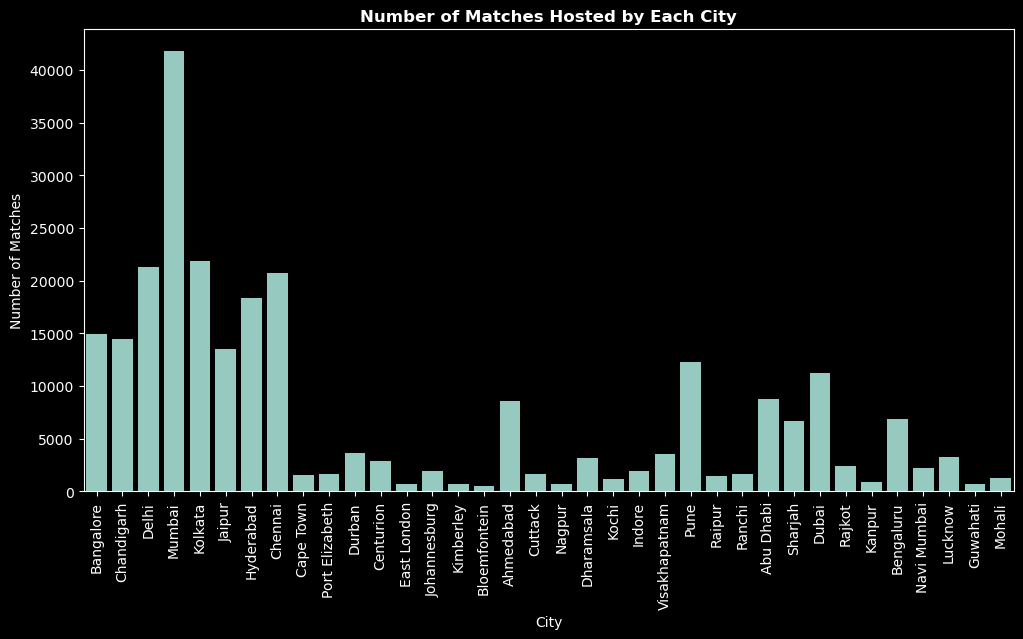

In [166]:
plt.figure(figsize=(12,6))
plt.style.use("dark_background")
sns.countplot(data=df,x='city')
plt.title('Number of Matches Hosted by Each City',weight='bold')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

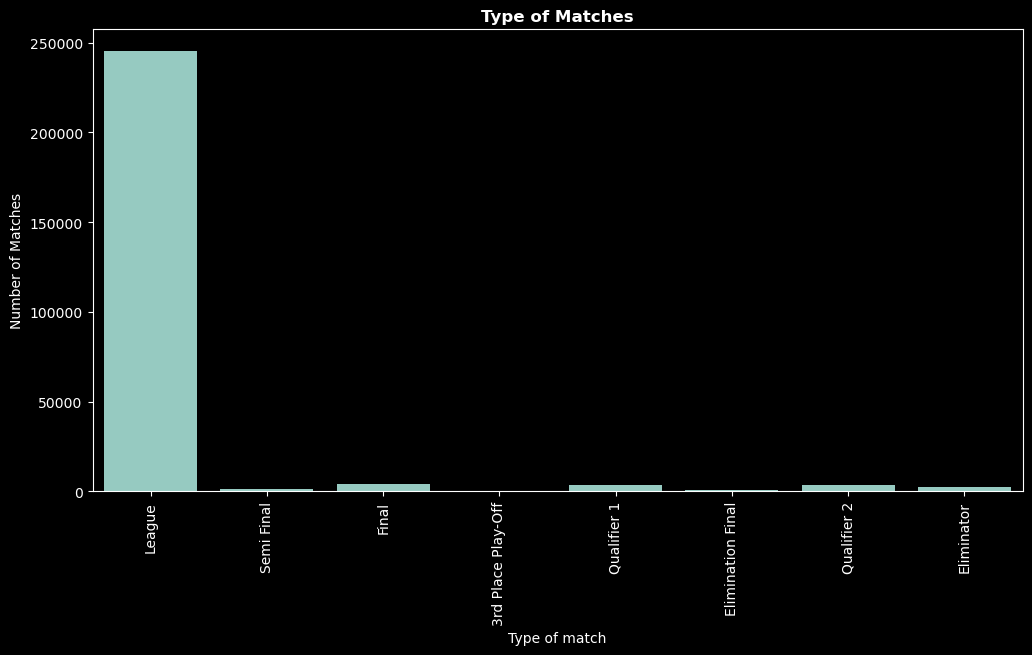

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='match_type')
plt.title('Type of Matches',weight='bold')
plt.xlabel('Type of match')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

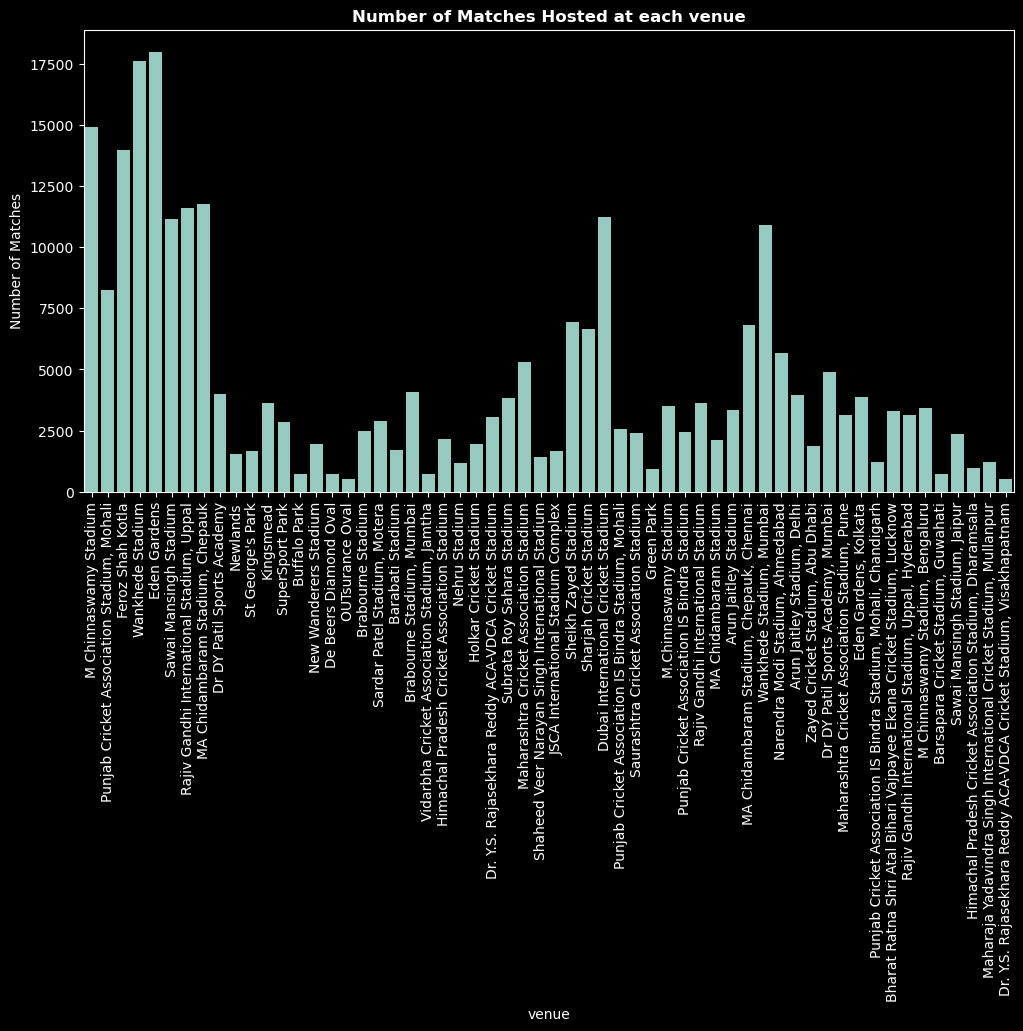

In [50]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='venue')
plt.title('Number of Matches Hosted at each venue',weight='bold')
plt.xlabel('venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Matches Over Seasons'}, xlabel='Year', ylabel='No of Matches'>

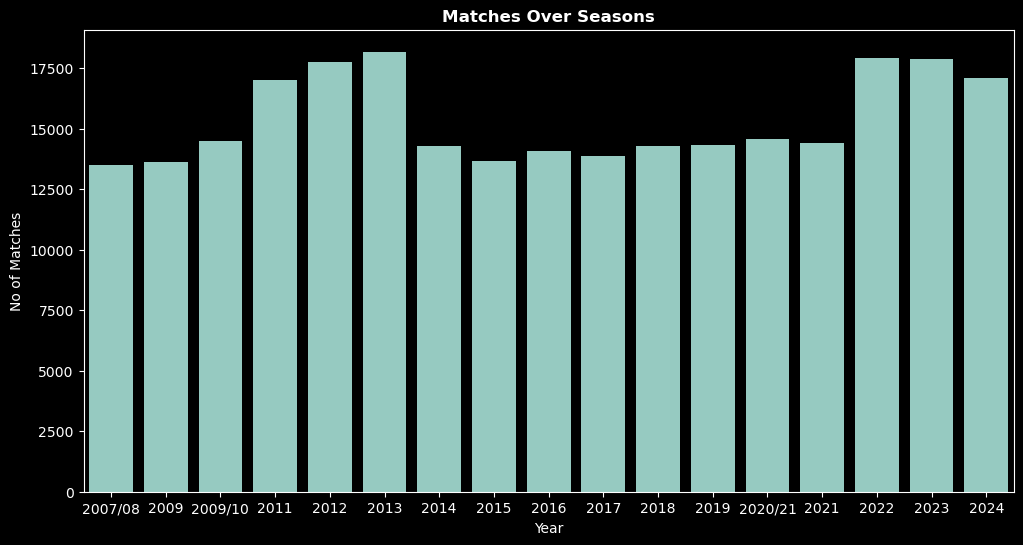

In [51]:
plt.figure(figsize=(12,6))
plt.title("Matches Over Seasons",weight='bold')
plt.xlabel("Year")
plt.ylabel("No of Matches")
sns.countplot(data=df,x='season')

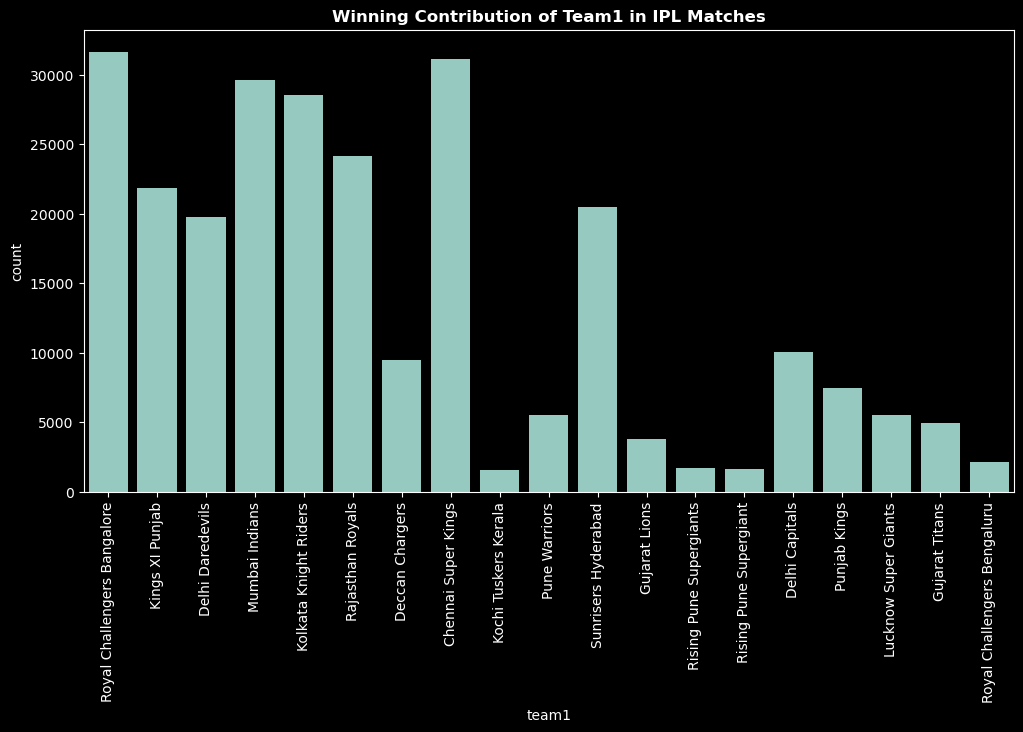

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='team1')
plt.title('Winning Contribution of Team1 in IPL Matches',weight='bold')
plt.xticks(rotation=90)
plt.show()

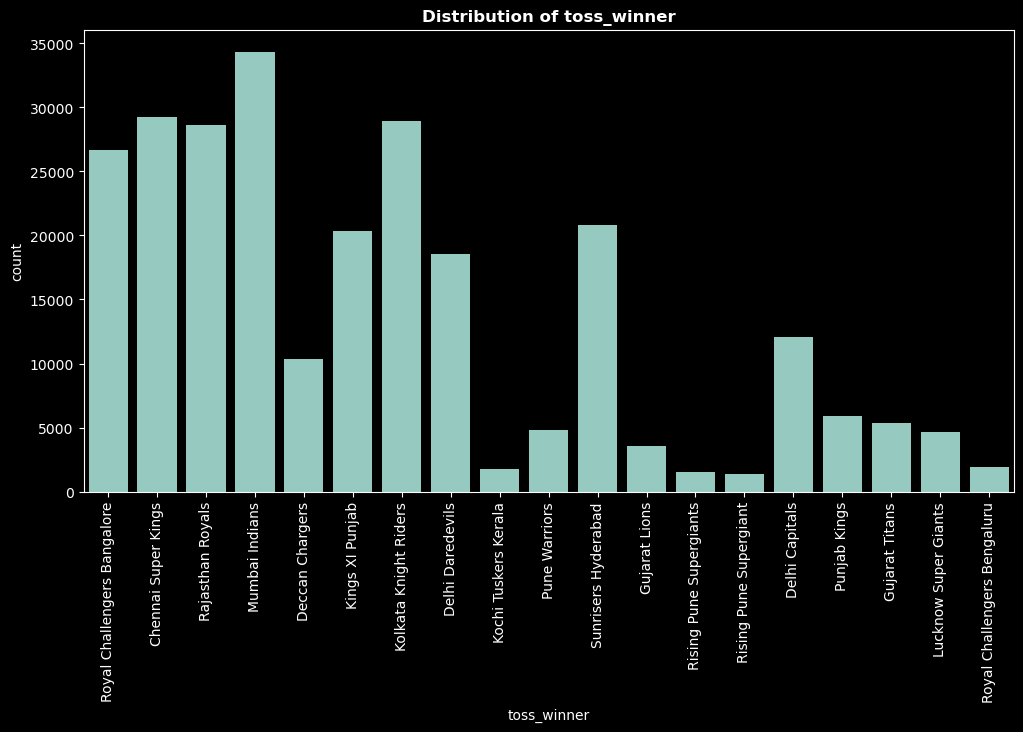

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='toss_winner')
plt.title('Distribution of toss_winner',weight='bold')
plt.xticks(rotation=90)
plt.show()

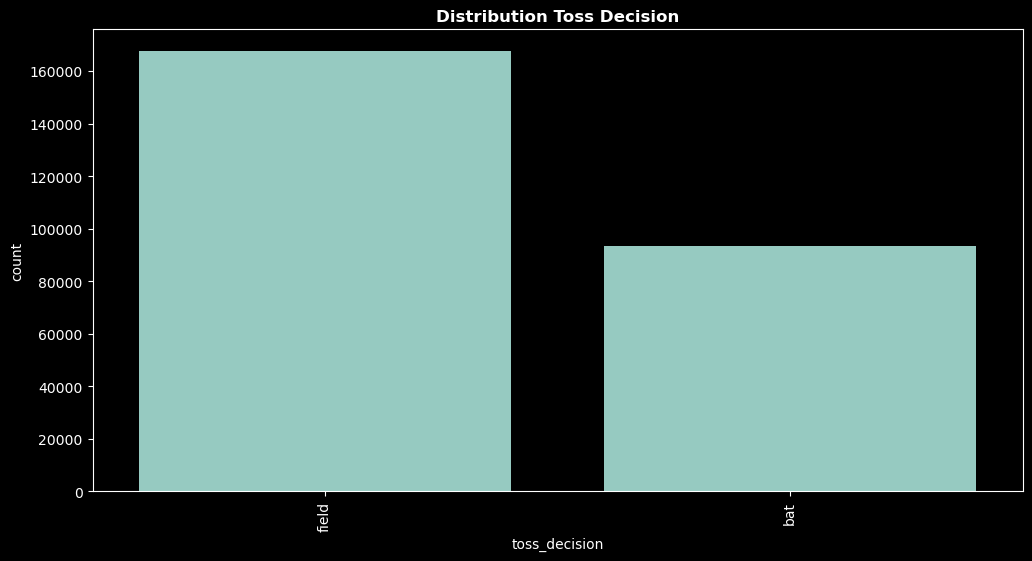

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='toss_decision')
plt.title('Distribution Toss Decision',weight='bold')
plt.xticks(rotation=90)
plt.show()

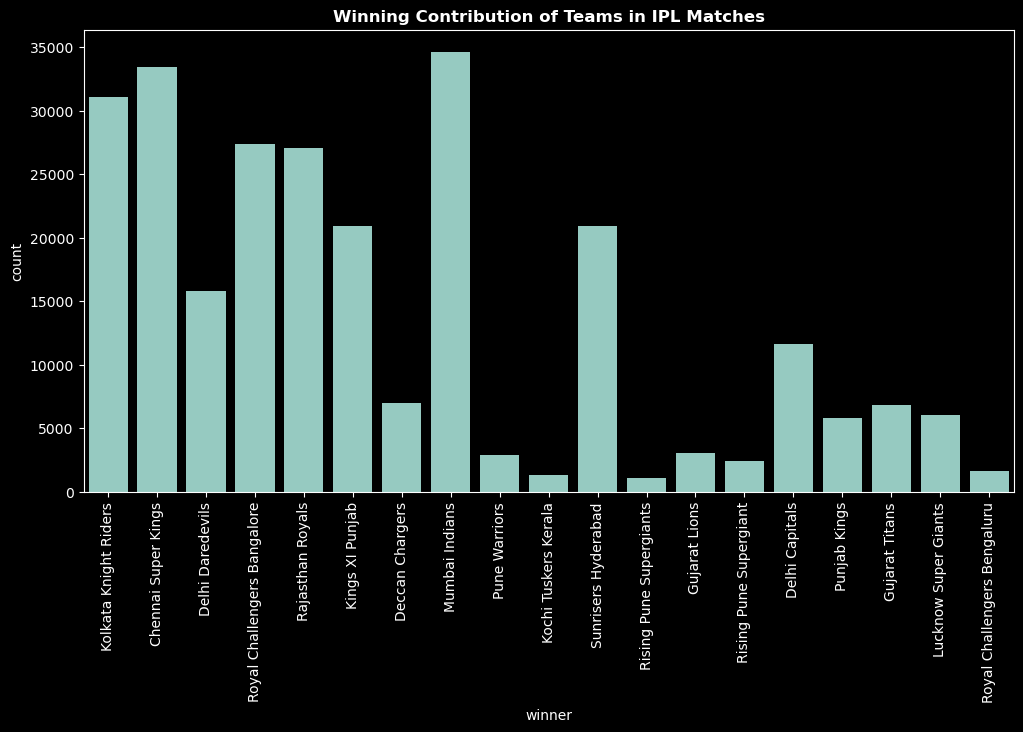

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='winner')
plt.title('Winning Contribution of Teams in IPL Matches',weight='bold')
plt.xticks(rotation=90)
plt.show()

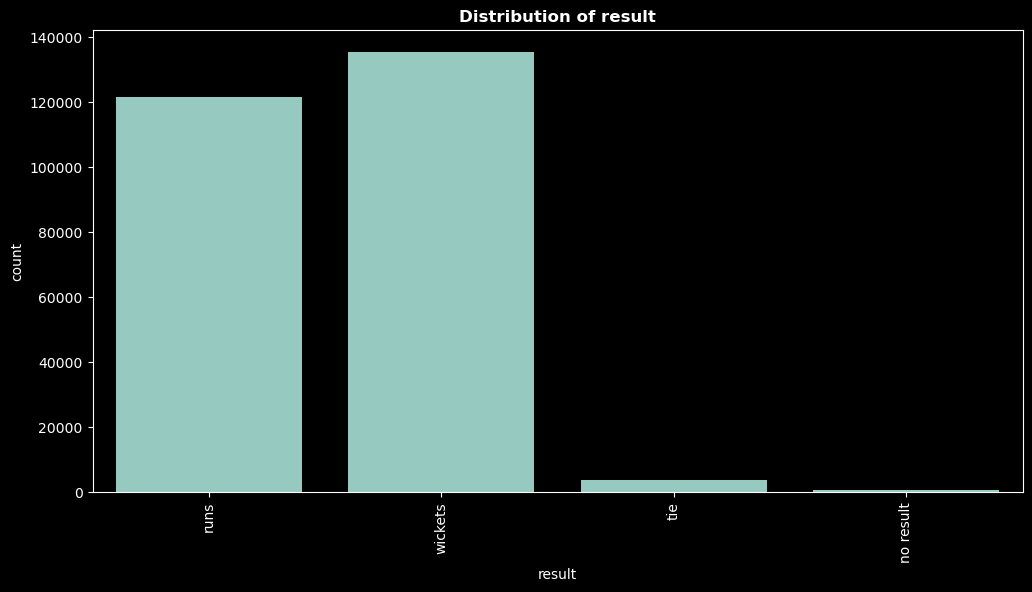

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='result')
plt.title('Distribution of result',weight='bold')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Frequency')

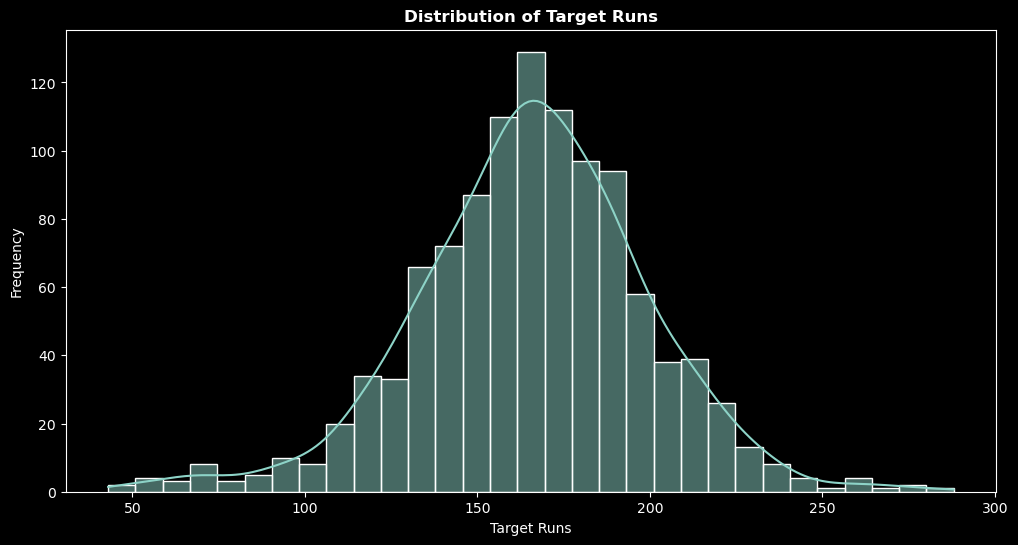

In [57]:
plt.figure(figsize = (12,6))
sns.histplot(matches_df['target_runs'], kde=True)
plt.title('Distribution of Target Runs',weight='bold')
plt.xlabel('Target Runs')
plt.ylabel('Frequency')

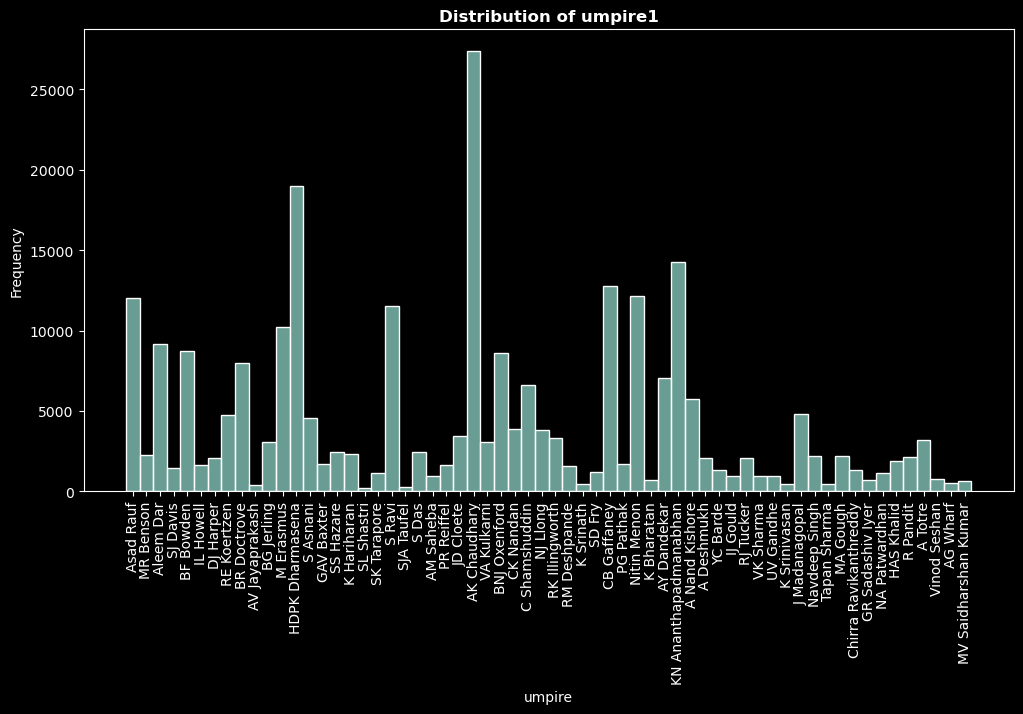

In [58]:
plt.figure(figsize = (12,6))
sns.histplot(df['umpire1'])
plt.title('Distribution of umpire1',weight='bold')
plt.xlabel('umpire')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

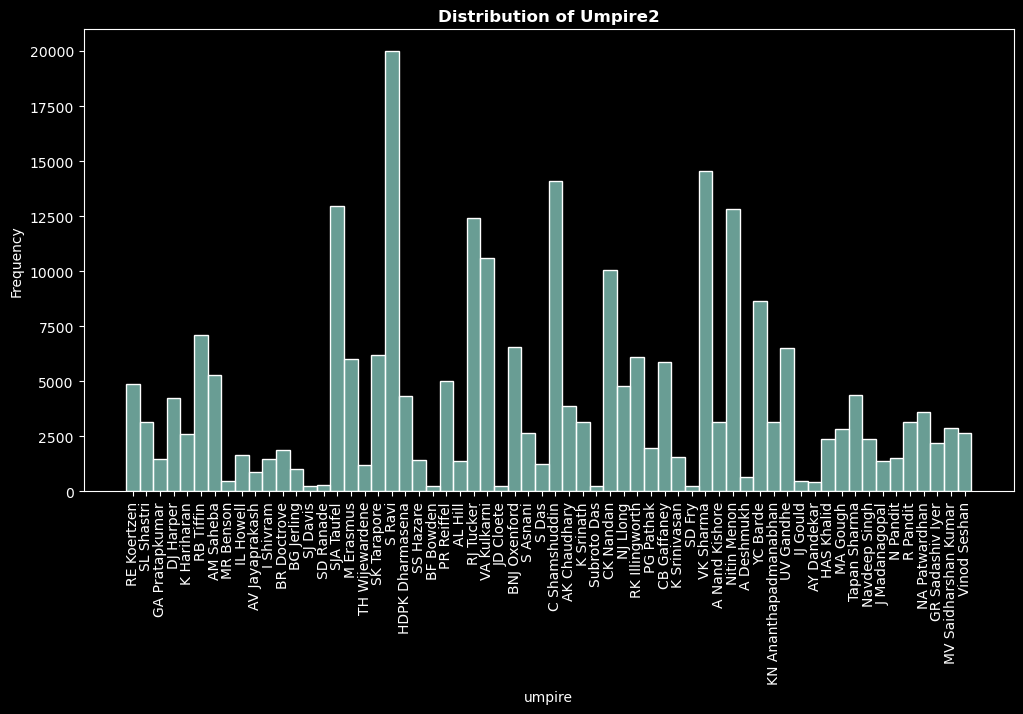

In [59]:
plt.figure(figsize = (12,6))
sns.histplot(df['umpire2'])
plt.title('Distribution of Umpire2',weight='bold')
plt.xlabel('umpire')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

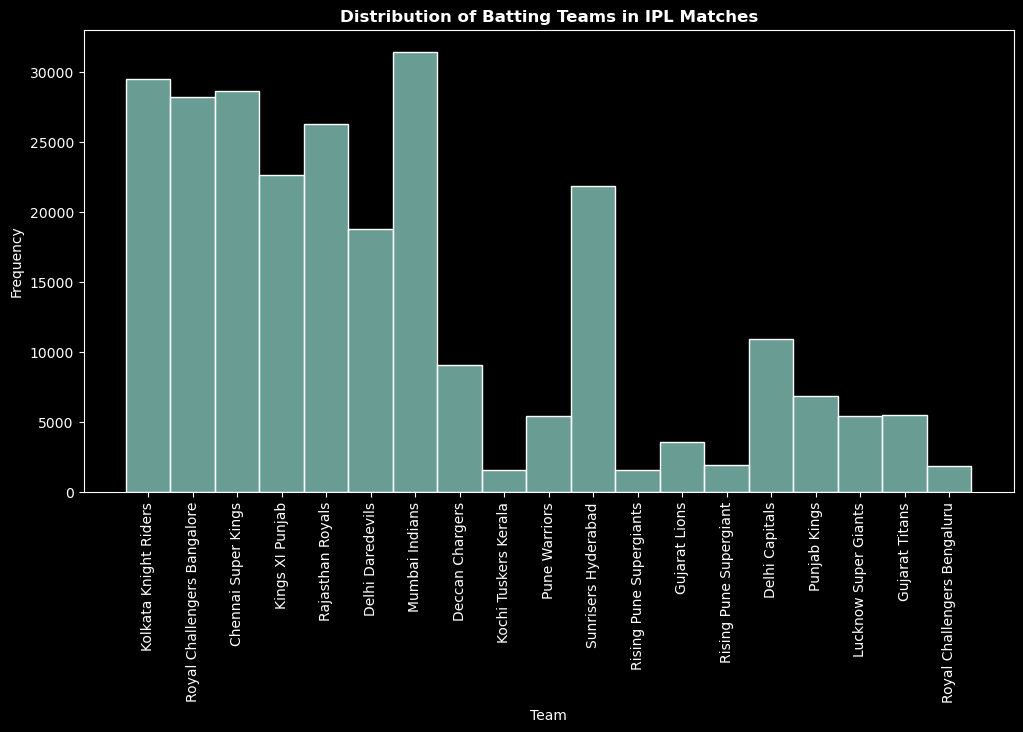

In [60]:
plt.figure(figsize = (12,6))
sns.histplot(df['batting_team'])
plt.title('Distribution of Batting Teams in IPL Matches',weight='bold')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

__BI Variate Analysis__

__Season vs Winner__

In [63]:
df.pivot_table(index='season', columns='winner', aggfunc='size',fill_value=0)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,,
2007/08,2127,438,0,1641,0,0,2303,0,1400,0,1509,0,0,3094,0,0,977,0,0
2009,1869,2164,0,2305,0,0,1744,0,679,0,1205,0,0,1474,0,0,2166,0,0
2009/10,2181,1974,0,1699,0,0,977,0,1711,0,2704,0,0,1431,0,0,1821,0,0
2011,2702,1453,0,1045,0,0,1656,1322,1819,0,2416,916,0,1362,0,0,2322,0,0
2012,2402,984,0,2433,0,0,1919,0,2938,0,2443,990,0,1703,0,0,1955,0,0
2013,2915,0,0,712,0,0,1879,0,1438,0,3173,977,0,2644,0,0,2056,0,2383
2014,2355,0,0,487,0,0,2909,0,2626,0,1685,0,0,1655,0,0,1204,0,1379
2015,2444,0,0,1187,0,0,632,0,1949,0,2457,0,0,1744,0,0,1574,0,1665
2016,0,0,0,1654,2139,0,955,0,1799,0,1684,0,0,0,0,1105,2137,0,2623


__Toss winner vs Toss Decision__

In [65]:
toss_decision=df.pivot_table(index='toss_winner',columns='toss_decision',aggfunc='size',fill_value=0)
toss_decision

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,14192,15052
Deccan Chargers,5756,4620
Delhi Capitals,2948,9156
Delhi Daredevils,6685,11863
Gujarat Lions,263,3323
Gujarat Titans,1422,3951
Kings XI Punjab,6450,13876
Kochi Tuskers Kerala,702,1058
Kolkata Knight Riders,9070,19859


<Axes: xlabel='toss_winner'>

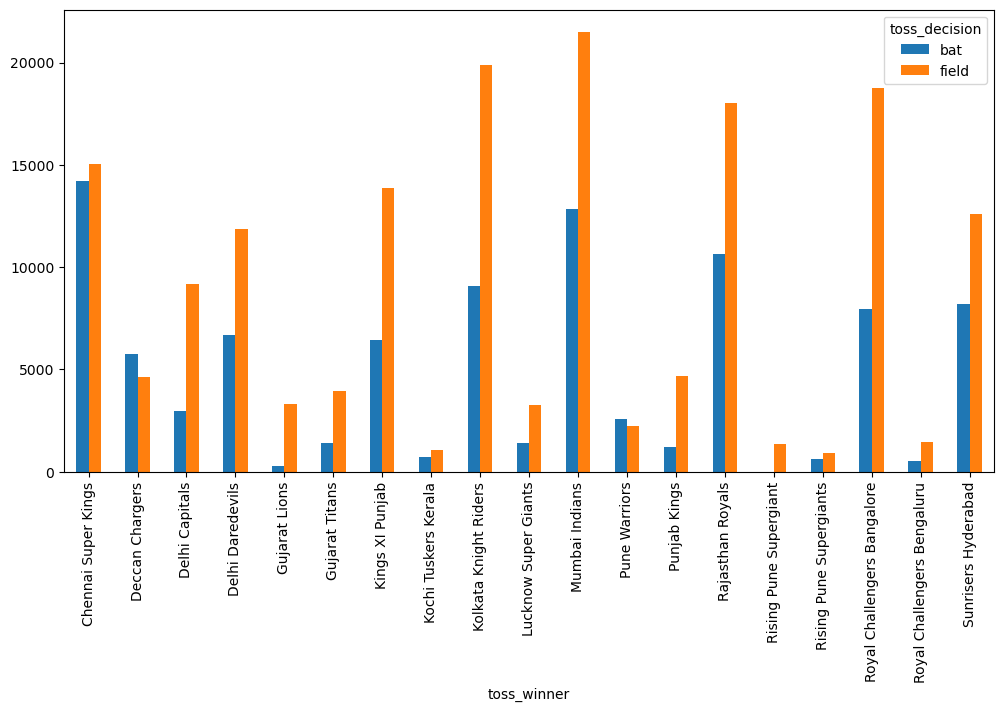

In [66]:
plt.style.use("default")
toss_decision.plot(kind='bar',figsize=(12,6))

__Season vs Target runs__

In [68]:
target_runs=df.pivot_table(index='season', values='target_runs', aggfunc='mean')
target_runs

,target_runs
season,
2007/08,162.639706
2009,150.210128
2009/10,166.637122
2011,155.752366
2012,159.502505
2013,157.950982
2014,164.007762
2015,167.851890
2016,162.666288


Text(0, 0.5, 'Average Target Runs')

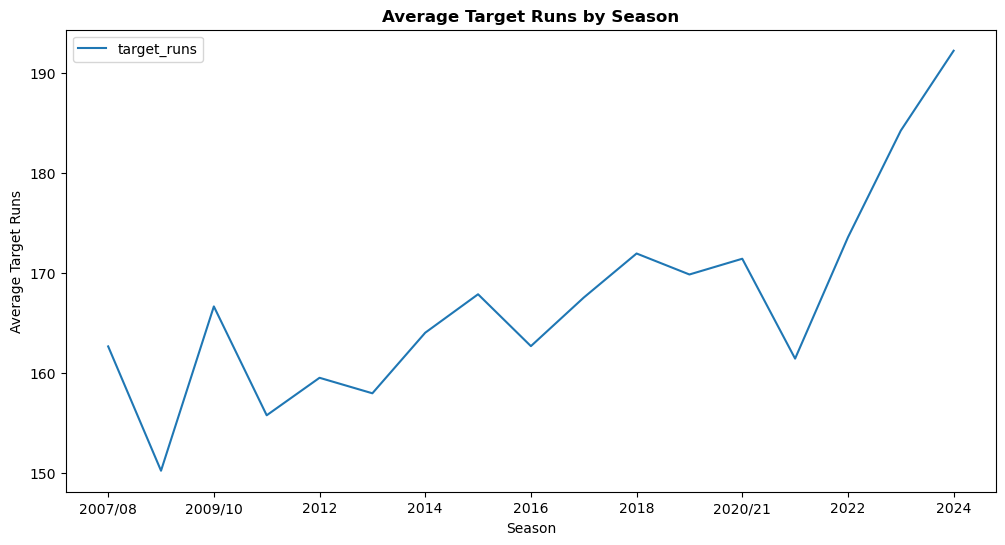

In [69]:
target_runs.plot(kind='line',figsize=(12,6))
plt.title('Average Target Runs by Season',weight='bold',)
plt.xlabel('Season')
plt.ylabel('Average Target Runs')

In [70]:
total_matches= (df['team1'].value_counts() + df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
total_wins = df['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')
team_fielding_first = df[df['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='team_fielding_first')
team_batting_first = df[df['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')
merged_df = total_matches.merge(total_wins, on='Team') \
.merge(team_fielding_first, on='Team') \
.merge(team_batting_first, on='Team')
merged_df

,Team,Total_Match_Played,Total_Wins,team_fielding_first,Batting_First_Wins
0,Chennai Super Kings,57227,33388,18258,15130
1,Deccan Chargers,18073,7013,3615,3398
2,Delhi Capitals,22162,11641,8476,3165
3,Delhi Daredevils,37511,15772,8804,6968
4,Gujarat Lions,7111,3063,2584,479
5,Gujarat Titans,10795,6793,4688,2105
6,Kings XI Punjab,45129,20948,15285,5663
7,Kolkata Knight Riders,59177,31078,19244,11834
8,Lucknow Super Giants,10626,6050,4589,1461
9,Mumbai Indians,62942,34629,21494,13135


Text(0.5, 1.0, 'Toss Wins and Match Outcomes by Team in IPL')

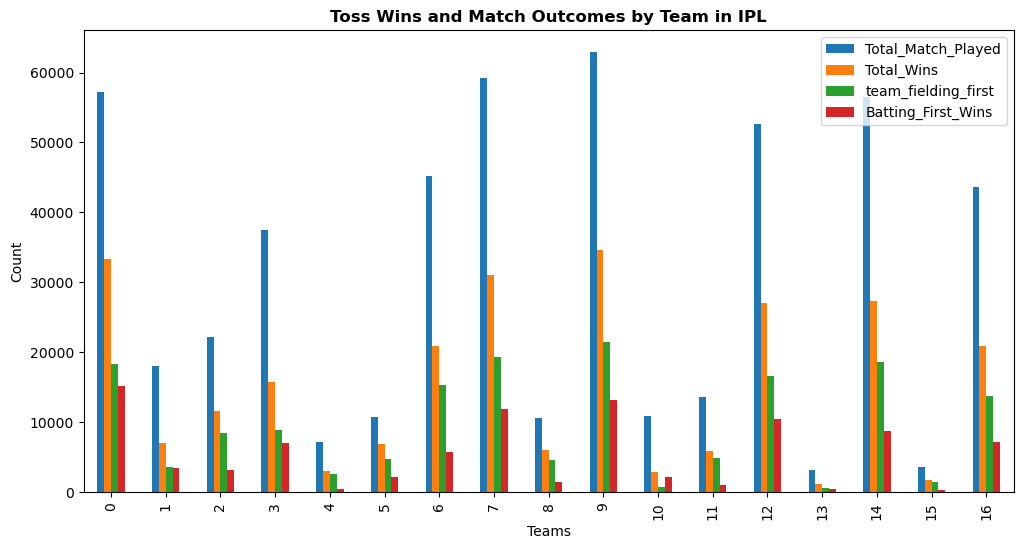

In [71]:
merged_df.plot(kind='bar',figsize=(12,6))
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Toss Wins and Match Outcomes by Team in IPL',weight='bold') 

__Top 20 Batsmen__

In [73]:
top_batsmen = df.pivot_table(index='batter', values='batsman_runs', aggfunc='sum') 
top_20 = top_batsmen.nlargest(20, 'batsman_runs')
top_20

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536
MS Dhoni,5243
AB de Villiers,5181
CH Gayle,4997
RV Uthappa,4954


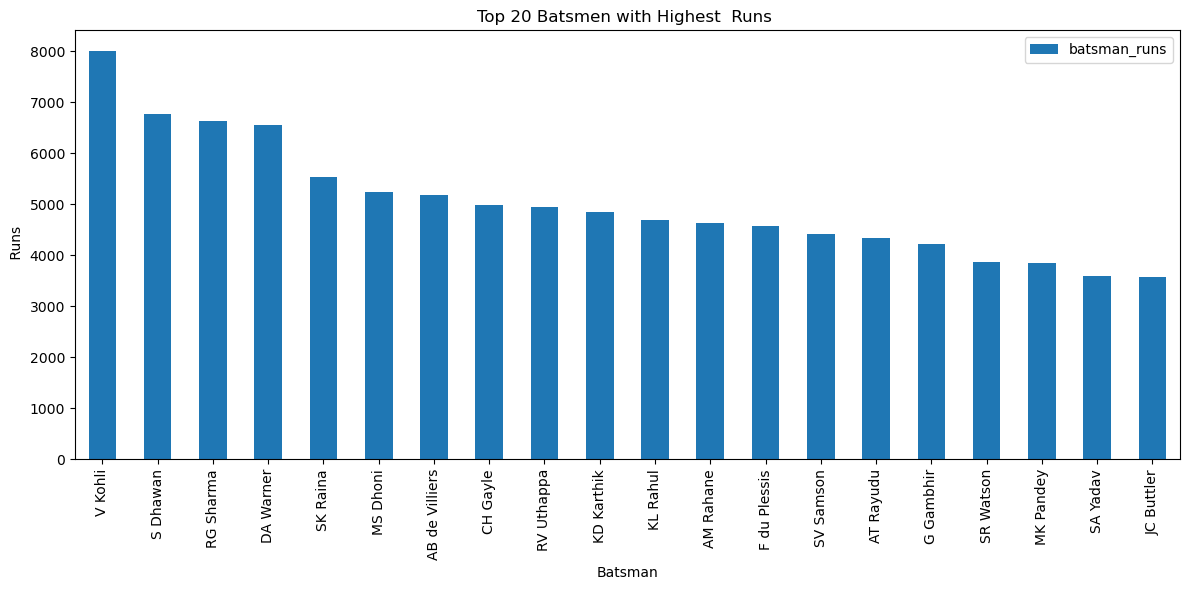

In [74]:
top_20.plot(kind='bar',figsize=(12,6))
plt.title('Top 20 Batsmen with Highest  Runs ')
plt.xlabel('Batsman')
plt.ylabel(' Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

__Winning Team vs Runs__

In [76]:
df[df['winner'] == df['batting_team']].groupby('winner')['target_runs'].mean()

winner
Chennai Super Kings            170.355304
Deccan Chargers                159.372390
Delhi Capitals                 173.907600
Delhi Daredevils               163.564951
Gujarat Lions                  167.884247
Gujarat Titans                 176.137238
Kings XI Punjab                166.742690
Kochi Tuskers Kerala           146.708197
Kolkata Knight Riders          163.292162
Lucknow Super Giants           185.056653
Mumbai Indians                 169.669212
Pune Warriors                  152.976512
Punjab Kings                   180.181596
Rajasthan Royals               169.014080
Rising Pune Supergiant         158.081563
Rising Pune Supergiants        127.043388
Royal Challengers Bangalore    168.369100
Royal Challengers Bengaluru    200.065271
Sunrisers Hyderabad            167.132825
Name: target_runs, dtype: float64

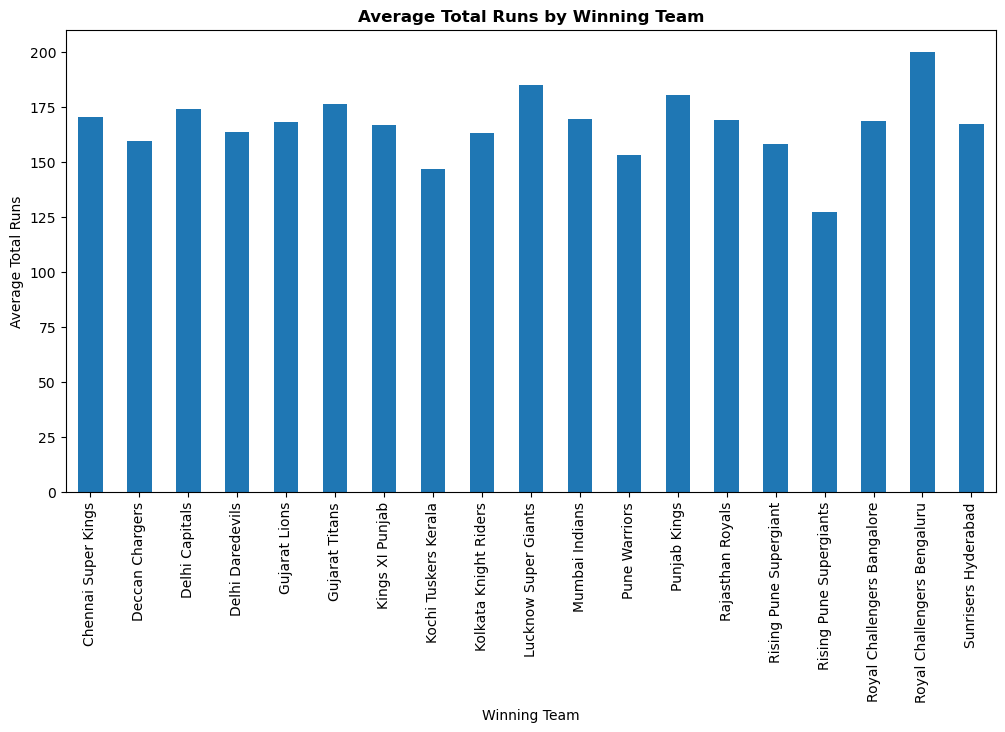

In [77]:
plt.figure(figsize=(12,6))
winning_team_runs = df[df['winner'] == df['batting_team']].groupby('winner')['target_runs'].mean() 
winning_team_runs.plot(kind='bar')
plt.xlabel('Winning Team') 
plt.ylabel('Average Total Runs')
plt.title('Average Total Runs by Winning Team',weight='bold') 
plt.xticks(rotation=90)
plt.show()

__Runs vs. Overs__

<Figure size 1200x600 with 0 Axes>

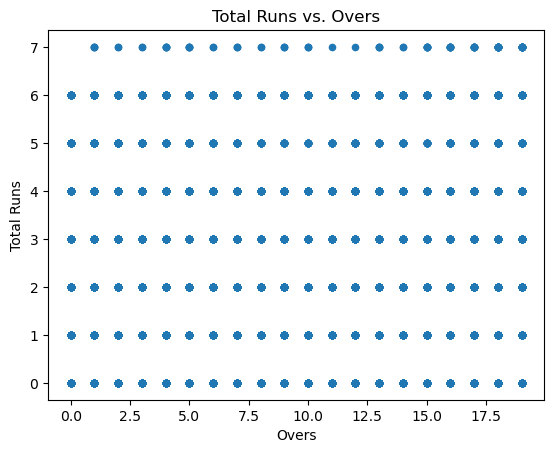

In [79]:
plt.figure(figsize=(12,6))
df.plot.scatter(x='over', y='total_runs',)
plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.title('Total Runs vs. Overs')
plt.show()

__Multivariate Analysis__

In [81]:
team_performance = df.groupby(['team1', 'team2']).agg({ 'total_runs': 'sum', 'is_wicket': 'sum' }).reset_index()

In [82]:
team_performance

,team1,team2,total_runs,is_wicket
0,Chennai Super Kings,Deccan Chargers,2120,87
1,Chennai Super Kings,Delhi Capitals,2296,89
2,Chennai Super Kings,Delhi Daredevils,3078,123
3,Chennai Super Kings,Gujarat Titans,1647,63
4,Chennai Super Kings,Kings XI Punjab,3859,139
...,...,...,...,...
209,Sunrisers Hyderabad,Rajasthan Royals,2423,98
210,Sunrisers Hyderabad,Rising Pune Supergiant,284,17
211,Sunrisers Hyderabad,Rising Pune Supergiants,212,11
212,Sunrisers Hyderabad,Royal Challengers Bangalore,3221,117


Understand how different teams perform against each other in terms of runs and wickets

In [84]:
toss_decision=df.pivot_table(index=['toss_winner', 'toss_decision'], values='result_margin', aggfunc='mean').reset_index()
toss_decision

,toss_winner,toss_decision,result_margin
0,Chennai Super Kings,bat,24.520011
1,Chennai Super Kings,field,12.538932
2,Deccan Chargers,bat,12.476546
3,Deccan Chargers,field,16.403463
4,Delhi Capitals,bat,9.573270
5,Delhi Capitals,field,23.151048
6,Delhi Daredevils,bat,13.824533
7,Delhi Daredevils,field,21.162101
8,Gujarat Lions,bat,8.000000
9,Gujarat Lions,field,19.303039


In [178]:
pivot_table = df.pivot_table(index='batter', columns='over', values='batsman_runs', aggfunc='sum')
pivot_table

over,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
batter,,,,,,,,,,,,,,,,,,,,
A Ashish Reddy,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0,22.0,29.0,22.0,32.0,42.0,61.0,57.0
A Badoni,NaN,1.0,2.0,6.0,3.0,6.0,11.0,17.0,11.0,30.0,13.0,28.0,26.0,41.0,59.0,48.0,76.0,77.0,100.0,79.0
A Chandila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0
A Chopra,2.0,7.0,3.0,1.0,5.0,9.0,2.0,4.0,4.0,13.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
A Choudhary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,NaN,1.0,4.0,2.0,1.0,9.0,1.0,1.0,NaN,NaN,2.0,3.0,1.0,2.0,3.0,6.0,2.0,5.0,4.0,NaN
Younis Khan,NaN,2.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yudhvir Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,19.0,0.0,NaN,NaN,1.0


In [186]:
wickets= df.pivot_table(index='bowler',values='is_wicket', aggfunc='sum').reset_index()
wickets

,bowler,is_wicket
0,A Ashish Reddy,19
1,A Badoni,2
2,A Chandila,11
3,A Choudhary,5
4,A Dananjaya,0
...,...,...
525,Yash Dayal,31
526,Yash Thakur,27
527,Yudhvir Singh,4
528,Yuvraj Singh,39
